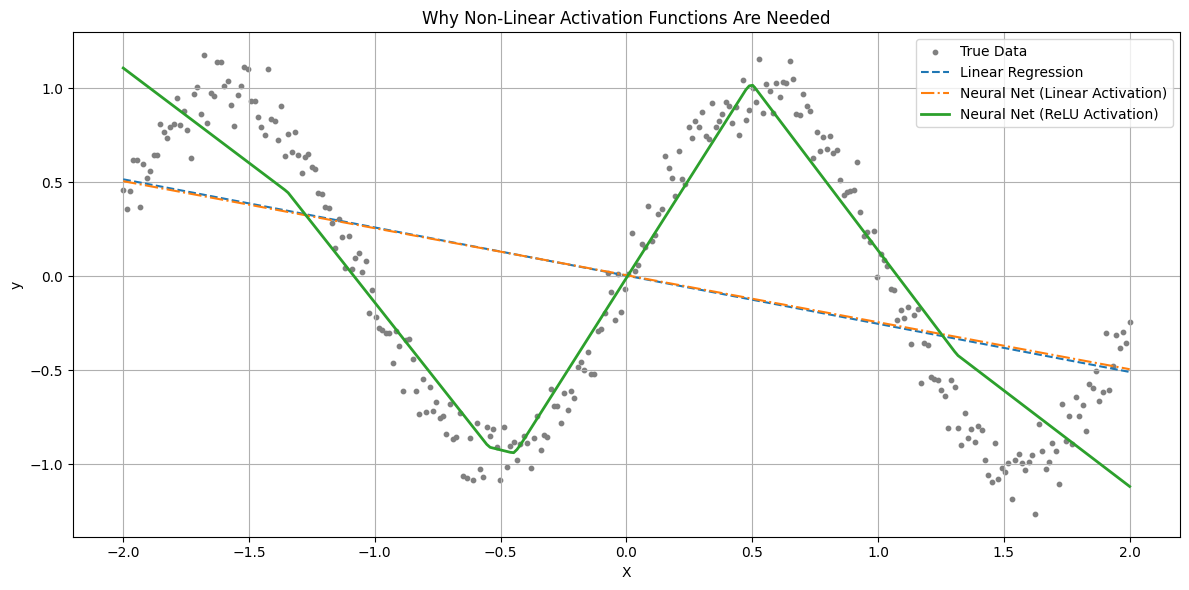

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Generate synthetic nonlinear data
np.random.seed(0)
X = np.linspace(-2, 2, 300).reshape(-1, 1)
y_true = np.sin(3 * X) + 0.1 * np.random.randn(*X.shape)

# Linear regression (no activation functions)
lin_reg = LinearRegression()
lin_reg.fit(X, y_true)
y_lin_pred = lin_reg.predict(X)

# Neural network with linear activation (acts as linear model)
mlp_linear = MLPRegressor(hidden_layer_sizes=(10, 10),
                          activation='identity',  # linear activation
                          max_iter=1000,
                          random_state=0)
mlp_linear.fit(X, y_true.ravel())
y_mlp_lin_pred = mlp_linear.predict(X)

# Neural network with non-linear activation (ReLU)
mlp_relu = MLPRegressor(hidden_layer_sizes=(10, 10),
                        activation='relu',
                        max_iter=1000,
                        random_state=0)
mlp_relu.fit(X, y_true.ravel())
y_mlp_relu_pred = mlp_relu.predict(X)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(X, y_true, s=10, color='gray', label='True Data')
plt.plot(X, y_lin_pred, label='Linear Regression', linestyle='--')
plt.plot(X, y_mlp_lin_pred, label='Neural Net (Linear Activation)', linestyle='-.')
plt.plot(X, y_mlp_relu_pred, label='Neural Net (ReLU Activation)', linewidth=2)
plt.legend()
plt.title('Why Non-Linear Activation Functions Are Needed')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()
plt.show()


# Can We Use a Different Linear Activation Other Than 'Identity'?

You might ask: what if we use a different linear function, like: 

$$
    f(x) = a x + b
$$

instead of the identity function $f(x) = x$. **Does that change anything?** Short Answer: No — It Still Collapses to a Linear Model.

Composing multiple linear functions is equivalent to a single linear function:

$$
    f_1(f_2(...f_n(x))) = A x + c
$$

No matter how many layers you stack — or which linear functions you use — the result is still just a single linear transformation from input to output. If your entire network is linear:

* The model cannot bend or curve the decision boundary.

* It cannot model XOR, sinusoids, image textures, etc.

* It’s essentially the same as logistic regression or linear regression, just more computationally expensive.